# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [39]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt


In [40]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('../../DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [41]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [42]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation


In [43]:
frame = pd.read_csv('../../DATA/train_cleaned.csv')

In [44]:
#Making filters 2009 - 2014 and 2015
filter_2015 = frame["pickup_year"] == 2015
filter_2009 = frame["pickup_year"] >= 2009
filter_2014 = frame["pickup_year"] <= 2014

frame_train = frame.where(filter_2009 & filter_2014)
frame_test = frame.where(filter_2015)

X_train = frame_train.dropna(axis=0, how='all')
X_test = frame_test.dropna(axis=0, how='all')

#X_train and X_Test
X_train = X_train.drop(drop_columns,axis=1)
X_test = X_test.drop(drop_columns,axis=1)

#y_train and X_train
y_train = X_train['fare_amount']
X_train = X_train.drop(['fare_amount'],axis=1)

#y_test and X_Test
y_test = X_test['fare_amount']
X_test = X_test.drop(['fare_amount'],axis=1)
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,is_dropoff_JFK,is_pickup_EWR,is_dropoff_EWR,is_pickup_la_guardia,is_dropoff_la_guardia,trip_distance,pickup_borough,dropoff_borough,is_pickup_lower_manhattan,is_dropoff_lower_manhattan
0,-73.844311,40.721319,-73.841610,40.712278,1.0,15.0,17.0,1.0,6.0,2009.0,...,0.0,0.0,0.0,0.0,0.0,0.640487,queens,queens,0.0,0.0
1,-74.016048,40.711303,-73.979268,40.782004,1.0,5.0,16.0,2.0,1.0,2010.0,...,0.0,0.0,0.0,0.0,0.0,5.250670,manhattan,manhattan,1.0,0.0
2,-73.982738,40.761270,-73.991242,40.750562,2.0,18.0,0.0,4.0,8.0,2011.0,...,0.0,0.0,0.0,0.0,0.0,0.863411,manhattan,manhattan,0.0,0.0
3,-73.987130,40.733143,-73.991567,40.758092,1.0,21.0,4.0,6.0,4.0,2012.0,...,0.0,0.0,0.0,0.0,0.0,1.739386,manhattan,manhattan,1.0,0.0
4,-73.968095,40.768008,-73.956655,40.783762,1.0,9.0,7.0,2.0,3.0,2010.0,...,0.0,0.0,0.0,0.0,0.0,1.242218,manhattan,manhattan,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399994,-73.951399,40.770201,-73.973983,40.763075,1.0,2.0,11.0,4.0,7.0,2009.0,...,0.0,0.0,0.0,0.0,0.0,1.280272,manhattan,manhattan,0.0,0.0
399995,-73.986585,40.746032,-73.990865,40.724077,1.0,1.0,12.0,0.0,9.0,2013.0,...,0.0,0.0,0.0,0.0,0.0,1.533405,manhattan,manhattan,0.0,1.0
399997,-73.985598,40.731558,-73.987657,40.728738,1.0,7.0,19.0,0.0,10.0,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.222679,manhattan,manhattan,1.0,1.0
399998,-74.007692,40.740735,-73.988455,40.722847,1.0,14.0,2.0,6.0,6.0,2014.0,...,0.0,0.0,0.0,0.0,0.0,1.594361,manhattan,manhattan,1.0,1.0


### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

## 1. Train model using RF regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,f1_score

In [46]:
# We change strings data to numbers data

le = LabelEncoder()

X_train["pickup_borough"] = le.fit_transform(X_train["pickup_borough"])
X_train["dropoff_borough"] = le.fit_transform(X_train["dropoff_borough"])

X_test["pickup_borough"] = le.fit_transform(X_test["pickup_borough"])
X_test["dropoff_borough"] = le.fit_transform(X_test["dropoff_borough"])

## 1.1 Random Forest Regression Model with default Parameter

In [48]:
clfr_without_parameter = RandomForestRegressor()

In [49]:
%%time
#Without parameters
clfr_without_parameter.fit(X_train,y_train)
Y_pred_no_optimize = clfr_without_parameter.predict(X_test)

print("The MSE is :",mean_squared_error(y_test, Y_pred_no_optimize))

The MSE is : 21.284403981035858
CPU times: user 6min 32s, sys: 2.52 s, total: 6min 34s
Wall time: 6min 35s


## 1.2 Random Forest Regression Model with Parameter change : #trees

In [50]:
clfr_trees_change = RandomForestRegressor(n_estimators=40)

clfr_trees_change.fit(X_train,y_train)
Y_pred_tree_test = clfr_trees_change.predict(X_test)

print("The MSE is :",mean_squared_error(y_test, Y_pred_tree_test))



The MSE is : 21.657259411717906


In [51]:
n_tree_estimators= [20,40,80,100,150,200,250]

Fscore_Train = []
Fscore_Test = []

for i in range(len(n_tree_estimators)):
    clfr_trees_change = RandomForestRegressor(n_estimators = n_tree_estimators[i],n_jobs=-1)
    clfr_trees_change.fit(X_train,y_train)
    
    a = clfr_trees_change.predict(X_train)
    Fscore_Train.append(mean_squared_error(y_train, a))
    
    b = clfr_trees_change.predict(X_test)
    Fscore_Test.append(mean_squared_error(y_test, b))

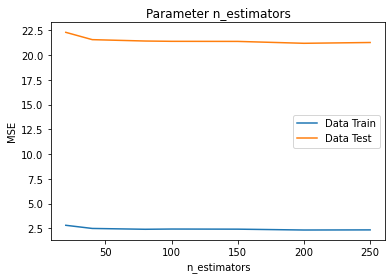

In [52]:

plt.plot(n_tree_estimators, Fscore_Train, label='Data Train')
plt.plot(n_tree_estimators, Fscore_Test, label='Data Test')

plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('Parameter n_estimators')
plt.legend()
plt.show()

## 1.3 Random Forest Regression Model with Parameter change : #max_depth

In [53]:
n_entry_max_depth_max = [1,5,20,40,70,100]

Fscore_Train = []
Fscore_Test = []

for i in range(len(n_entry_max_depth_max)):
    clfr_trees_change = RandomForestRegressor(max_depth = n_entry_max_depth_max[i],n_jobs=-1)
    clfr_trees_change.fit(X_train,y_train)
    
    a = clfr_trees_change.predict(X_train)
    Fscore_Train.append(mean_squared_error(y_train, a))
    
    b = clfr_trees_change.predict(X_test)
    Fscore_Test.append(mean_squared_error(y_test, b))

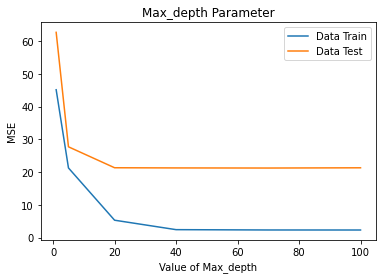

In [54]:
plt.plot(n_entry_max_depth_max, Fscore_Train, label='Data Train')
plt.plot(n_entry_max_depth_max, Fscore_Test, label='Data Test')

plt.xlabel('Value of Max_depth')
plt.ylabel('MSE')
plt.title('Max_depth Parameter')
plt.legend()
plt.show()

## 1.4 Random Forest Regression Model With Parameter : #Mean sample split

In [55]:
n_entry_mean_sample_split = [2,4,8,10,20]

Fscore_Train = []
Fscore_Test = []

for i in range(len(n_entry_mean_sample_split)):
    clfr_trees_change = RandomForestRegressor(min_samples_split = n_entry_mean_sample_split[i],n_jobs=-1)
    clfr_trees_change.fit(X_train,y_train)
    
    a = clfr_trees_change.predict(X_train)
    Fscore_Train.append(mean_squared_error(y_train, a))
    
    b = clfr_trees_change.predict(X_test)
    Fscore_Test.append(mean_squared_error(y_test, b))

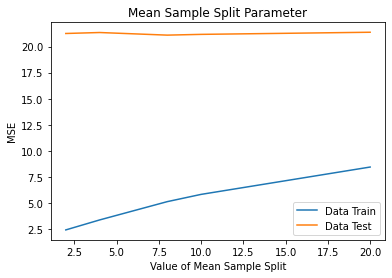

In [56]:
plt.plot(n_entry_mean_sample_split, Fscore_Train, label='Data Train')
plt.plot(n_entry_mean_sample_split, Fscore_Test, label='Data Test')

plt.xlabel('Value of Mean Sample Split')
plt.ylabel('MSE')
plt.title('Mean Sample Split Parameter')
plt.legend()
plt.show()

## 1.5 Random Forest Regression Model With Parameter : #Min samples leaf

In [57]:
n_entry_min_sample_leaf = [2,10,70]

Fscore_Train = []
Fscore_Test = []

for i in range(len(n_entry_min_sample_leaf)):
    clfr_trees_change = RandomForestRegressor( min_samples_leaf = n_entry_min_sample_leaf[i],n_jobs=-1)
    clfr_trees_change.fit(X_train,y_train)
    
    a = clfr_trees_change.predict(X_train)
    Fscore_Train.append(mean_squared_error(y_train, a))
    
    b = clfr_trees_change.predict(X_test)
    Fscore_Test.append(mean_squared_error(y_test, b))

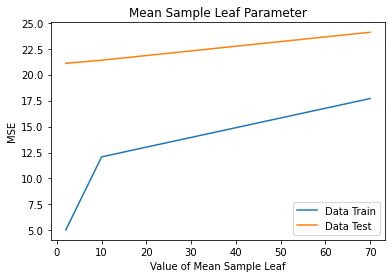

In [58]:
plt.plot(n_entry_min_sample_leaf, Fscore_Train, label='Data Train')
plt.plot(n_entry_min_sample_leaf, Fscore_Test, label='Data Test')

plt.xlabel('Value of Mean Sample Leaf')
plt.ylabel('MSE')
plt.title('Mean Sample Leaf Parameter')
plt.legend()
plt.show()

## 2 Random Forest Regression Model With Optimize Parameters

In [62]:
clfr_with_ajust_parameter = RandomForestRegressor(n_estimators = 30,min_samples_split =2,min_samples_leaf = 1,oob_score=True,n_jobs=-1)

In [65]:
clfr_with_ajust_parameter.fit(X_train, y_train)
print("The oob_score is : ",clfr_with_ajust_parameter.oob_score_)

# We have a oob_score > 0,75, it means our model does not overfit (the best possible score is equal to 1)

The oob_score is :  0.7943554664675598


/Users/joshuabonifond/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [66]:
y_pred= clfr_with_ajust_parameter.predict(X_test)

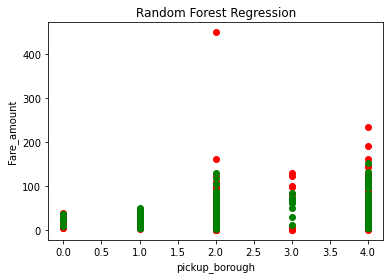

In [73]:
plt.scatter(X_test["pickup_borough"].values, y_test, color = 'red')
plt.scatter(X_test["pickup_borough"].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('pickup_borough')
plt.ylabel('Fare_amount')
plt.show()